In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, cv2, random, time, shutil, csv
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
np.random.seed(42)
%matplotlib inline 
import json
import os
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import BatchNormalization, Dense, GlobalAveragePooling2D, Lambda, Dropout, InputLayer, Input
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img

In [2]:
#Data Paths
train_dir = '../Data Preprocessing/data/train_test_crop_images/train/'
test_dir = '../Data Preprocessing/data/train_test_crop_images/validate/'
#Count/Print train and test samples.

In [3]:
#Read train labels.
npzfile = np.load('target_names.npz')
labels_dataframe = pd.DataFrame(npzfile['arr_0'], columns = ['breed'])
labels_dataframe.head(5)

,breed
0,Chihuahua
1,Japanese_spaniel
2,Maltese_dog
3,Pekinese
4,Shih


In [4]:
#Create list of alphabetically sorted labels.
dog_breeds = sorted(list(set(labels_dataframe['breed'])))
n_classes = len(dog_breeds)
print(n_classes)
dog_breeds[:10]

120


['Afghan_hound',
 'African_hunting_dog',
 'Airedale',
 'American_Staffordshire_terrier',
 'Appenzeller',
 'Australian_terrier',
 'Bedlington_terrier',
 'Bernese_mountain_dog',
 'Blenheim_spaniel',
 'Border_collie']

In [5]:
#Map each label string to an integer label.
class_to_num = dict(zip(dog_breeds, range(n_classes)))
class_to_num

{'Afghan_hound': 0,
 'African_hunting_dog': 1,
 'Airedale': 2,
 'American_Staffordshire_terrier': 3,
 'Appenzeller': 4,
 'Australian_terrier': 5,
 'Bedlington_terrier': 6,
 'Bernese_mountain_dog': 7,
 'Blenheim_spaniel': 8,
 'Border_collie': 9,
 'Border_terrier': 10,
 'Boston_bull': 11,
 'Bouvier_des_Flandres': 12,
 'Brabancon_griffon': 13,
 'Brittany_spaniel': 14,
 'Cardigan': 15,
 'Chesapeake_Bay_retriever': 16,
 'Chihuahua': 17,
 'Dandie_Dinmont': 18,
 'Doberman': 19,
 'English_foxhound': 20,
 'English_setter': 21,
 'English_springer': 22,
 'EntleBucher': 23,
 'Eskimo_dog': 24,
 'French_bulldog': 25,
 'German_shepherd': 26,
 'German_short': 27,
 'Gordon_setter': 28,
 'Great_Dane': 29,
 'Great_Pyrenees': 30,
 'Greater_Swiss_Mountain_dog': 31,
 'Ibizan_hound': 32,
 'Irish_setter': 33,
 'Irish_terrier': 34,
 'Irish_water_spaniel': 35,
 'Irish_wolfhound': 36,
 'Italian_greyhound': 37,
 'Japanese_spaniel': 38,
 'Kerry_blue_terrier': 39,
 'Labrador_retriever': 40,
 'Lakeland_terrier': 41,

In [6]:
class_to_num['toy_poodle']

115

In [7]:
files = []
breeds = []

for folder in os.listdir(train_dir):
    breed = folder.split('-')[1]
    for file in os.listdir(train_dir + folder):
        breeds.append(breed)
        files.append(train_dir + folder + '/' + file)
print(len(breeds))
print(len(files))

17756
17756


In [8]:
labels_dataframe = pd.DataFrame(list(zip(breeds, files)), columns=['breed', 'file_name'])
labels_dataframe.head()

,breed,file_name
0,Chihuahua,../Data Preprocessing/data/train_test_crop_ima...
1,Chihuahua,../Data Preprocessing/data/train_test_crop_ima...
2,Chihuahua,../Data Preprocessing/data/train_test_crop_ima...
3,Chihuahua,../Data Preprocessing/data/train_test_crop_ima...
4,Chihuahua,../Data Preprocessing/data/train_test_crop_ima...


In [9]:
codes = []
for index, data in labels_dataframe.iterrows():
    breed = data['breed']
    codes.append(class_to_num[breed])

In [10]:
codes

[17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,


In [11]:
y = to_categorical(codes) # encoded our features

In [12]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
from keras.applications.xception import Xception, preprocess_input as xception_preprocess
from keras.applications.nasnet import NASNetMobile, preprocess_input as nasnet_preprocess
from keras.applications.densenet import DenseNet121, preprocess_input as densenet_preprocess
from keras.applications.resnet_v2 import ResNet50V2, preprocess_input as resnet_v2_preprocess

from keras.layers import concatenate
from keras.layers import Input,Lambda
from keras.models import Model

input_shape = (224,224,3)
input_layer = Input(shape=input_shape)

#first extractor resnet50v2
preprocessor_resnet = Lambda(resnet_v2_preprocess)(input_layer)
resnet = ResNet50V2(weights = 'imagenet', include_top = False,input_shape = input_shape,pooling ='avg')(preprocessor_resnet)

# second extractor densenet
preprocessor_inception = Lambda(densenet_preprocess)(input_layer)
densenet = DenseNet121(weights = 'imagenet',
                                     include_top = False,input_shape = input_shape,pooling ='avg')(preprocessor_inception)

# # Third extractor nasnet
preprocessor_xception = Lambda(nasnet_preprocess)(input_layer)
nasnet = NASNetMobile(weights = 'imagenet',
                                     include_top = False,input_shape = input_shape,pooling ='avg')(preprocessor_xception)

merge = concatenate([resnet,nasnet,densenet])
model = Model(inputs = input_layer, outputs = merge)

In [15]:
model.save('feature_extractor.h5')

In [16]:
v= model.output.shape[1:]
print(v)

(4128,)


In [14]:
# for feature_extraction dataframe must have to contain file_name and  breed columns
def feature_extractor(df):
    img_size = (224,224,3)
    data_size = len(df)
    batch_size = 20
    X = np.zeros([data_size,4128], dtype=np.uint8)
#     y = np.zeros([data_size,120], dtype=np.uint8)
    datagen = ImageDataGenerator()
    generator = datagen.flow_from_dataframe(df,
    x_col = 'file_name', class_mode = None, 
    batch_size=20, shuffle = False,target_size = (img_size[:2]),color_mode = 'rgb')
    i = 0
    for input_batch in tqdm(generator):
        input_batch = model.predict(input_batch)
        X[i * batch_size : (i + 1) * batch_size] = input_batch
        i += 1
        if i * batch_size >= data_size:
           break
    return X

In [15]:
X = feature_extractor(labels_dataframe)

Found 17756 validated image filenames.


  0%|                                                                                          | 0/888 [00:00<?, ?it/s]

1/1 [==============================] - 8s 8s/step


  0%|                                                                                | 1/888 [00:08<2:00:13,  8.13s/it]

1/1 [==============================] - 2s 2s/step


  0%|▏                                                                               | 2/888 [00:10<1:12:15,  4.89s/it]

1/1 [==============================] - 3s 3s/step


  0%|▎                                                                                 | 3/888 [00:13<57:02,  3.87s/it]

1/1 [==============================] - 3s 3s/step


  0%|▎                                                                                 | 4/888 [00:16<50:04,  3.40s/it]

1/1 [==============================] - 3s 3s/step


  1%|▍                                                                                 | 5/888 [00:18<46:31,  3.16s/it]

1/1 [==============================] - 3s 3s/step


  1%|▌                                                                                 | 6/888 [00:21<44:50,  3.05s/it]

1/1 [==============================] - 3s 3s/step


  1%|▋                                                                                 | 7/888 [00:24<45:11,  3.08s/it]

1/1 [==============================] - 3s 3s/step


  1%|▋                                                                                 | 8/888 [00:28<46:07,  3.15s/it]

1/1 [==============================] - 3s 3s/step


  1%|▊                                                                                 | 9/888 [00:31<46:42,  3.19s/it]

1/1 [==============================] - 3s 3s/step


  1%|▉                                                                                | 10/888 [00:34<46:46,  3.20s/it]

1/1 [==============================] - 3s 3s/step


  1%|█                                                                                | 11/888 [00:38<48:03,  3.29s/it]

1/1 [==============================] - 3s 3s/step


  1%|█                                                                                | 12/888 [00:41<48:12,  3.30s/it]

1/1 [==============================] - 3s 3s/step


  1%|█▏                                                                               | 13/888 [00:44<48:00,  3.29s/it]

1/1 [==============================] - 3s 3s/step


  2%|█▎                                                                               | 14/888 [00:48<48:55,  3.36s/it]

1/1 [==============================] - 3s 3s/step


  2%|█▎                                                                               | 15/888 [00:51<48:59,  3.37s/it]

1/1 [==============================] - 3s 3s/step


  2%|█▍                                                                               | 16/888 [00:54<48:30,  3.34s/it]

1/1 [==============================] - 3s 3s/step


  2%|█▌                                                                               | 17/888 [00:58<48:04,  3.31s/it]

1/1 [==============================] - 3s 3s/step


  2%|█▋                                                                               | 18/888 [01:01<47:28,  3.27s/it]

1/1 [==============================] - 3s 3s/step


  2%|█▋                                                                               | 19/888 [01:04<47:04,  3.25s/it]

1/1 [==============================] - 3s 3s/step


  2%|█▊                                                                               | 20/888 [01:07<46:50,  3.24s/it]

1/1 [==============================] - 3s 3s/step


  2%|█▉                                                                               | 21/888 [01:11<47:14,  3.27s/it]

1/1 [==============================] - 3s 3s/step


  2%|██                                                                               | 22/888 [01:14<47:11,  3.27s/it]

1/1 [==============================] - 3s 3s/step


  3%|██                                                                               | 23/888 [01:21<50:53,  3.53s/it]


KeyboardInterrupt: 

In [19]:
X.shape

(17756, 4128)

In [29]:
from keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
#Prepare call backs
EarlyStop_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('cnn_transfer_learning_feature_extract.h5',
                             monitor = 'val_loss',mode = 'min',save_best_only= True)
lr = ReduceLROnPlateau(monitor = 'val_loss',factor = 0.5,patience = 3,min_lr = 0.00001)
my_callback=[EarlyStop_callback,checkpoint, lr]

In [28]:
dnn = keras.models.Sequential([
    InputLayer(X.shape[1:]),
    Dropout(0.7),
    Dense(n_classes, activation='softmax')
])

dnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train simple DNN on extracted features.
h = dnn.fit(X , y,
            batch_size=128,
            epochs=60,
            validation_split=0.1 ,
           callbacks = my_callback)

Epoch 1/60
125/125 [==============================] - 2s 15ms/step - loss: 1.7129 - accuracy: 0.5857 - val_loss: 9.8685 - val_accuracy: 0.0422 - lr: 0.0010
Epoch 2/60
125/125 [==============================] - 2s 13ms/step - loss: 0.5643 - accuracy: 0.8307 - val_loss: 10.5944 - val_accuracy: 0.0411 - lr: 0.0010
Epoch 3/60
125/125 [==============================] - 2s 13ms/step - loss: 0.4331 - accuracy: 0.8668 - val_loss: 11.0106 - val_accuracy: 0.0411 - lr: 0.0010
Epoch 4/60
125/125 [==============================] - 2s 13ms/step - loss: 0.3553 - accuracy: 0.8896 - val_loss: 11.4161 - val_accuracy: 0.0422 - lr: 0.0010
Epoch 5/60
125/125 [==============================] - 2s 13ms/step - loss: 0.3122 - accuracy: 0.8996 - val_loss: 11.5813 - val_accuracy: 0.0411 - lr: 0.0010
Epoch 6/60
125/125 [==============================] - 2s 14ms/step - loss: 0.2609 - accuracy: 0.9137 - val_loss: 11.7876 - val_accuracy: 0.0417 - lr: 0.0010
Epoch 7/60
125/125 [==============================] - 2s 14

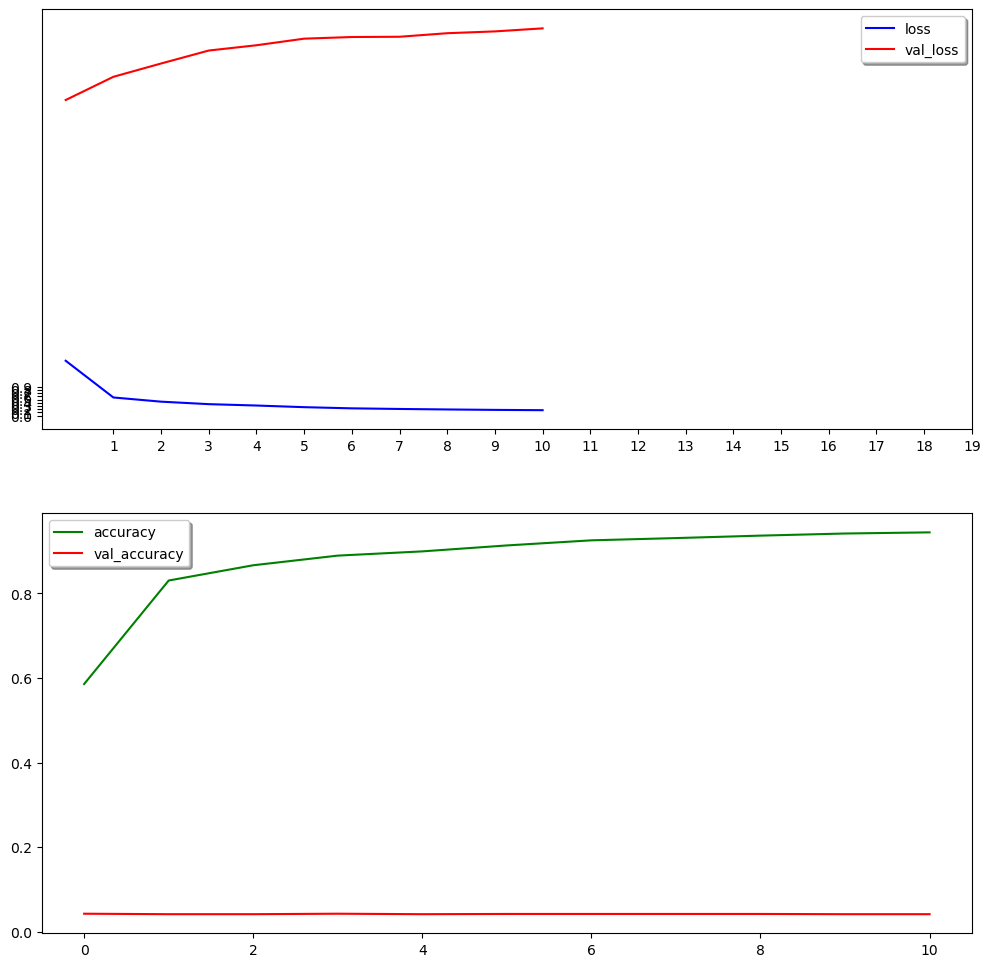

In [45]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

ax1.plot(h.history['loss'],color = 'b',label = 'loss')
ax1.plot(h.history['val_loss'],color = 'r',label = 'val_loss')
ax1.set_xticks(np.arange(1, 20, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.legend(['loss','val_loss'],shadow = True)


ax2.plot(h.history['accuracy'],color = 'green',label = 'accuracy')
ax2.plot(h.history['val_accuracy'],color = 'red',label = 'val_accuracy')
ax2.legend(['accuracy','val_accuracy'],shadow = True)
plt.show()

In [31]:
from keras.models import load_model
dnn.save('dogbreed.h5')

# Prediction of the Test Data

In [17]:
test_data = []

for root,dir,files in os.walk(test_dir):
   for file in files:
      test_data.append(os.path.join(root,file))

test_data

['../Data Preprocessing/data/train_test_crop_images/validate/n02085620-Chihuahua\\128.jpg',
 '../Data Preprocessing/data/train_test_crop_images/validate/n02085620-Chihuahua\\129.jpg',
 '../Data Preprocessing/data/train_test_crop_images/validate/n02085620-Chihuahua\\130.jpg',
 '../Data Preprocessing/data/train_test_crop_images/validate/n02085620-Chihuahua\\131.jpg',
 '../Data Preprocessing/data/train_test_crop_images/validate/n02085620-Chihuahua\\132.jpg',
 '../Data Preprocessing/data/train_test_crop_images/validate/n02085620-Chihuahua\\133.jpg',
 '../Data Preprocessing/data/train_test_crop_images/validate/n02085620-Chihuahua\\134.jpg',
 '../Data Preprocessing/data/train_test_crop_images/validate/n02085620-Chihuahua\\135.jpg',
 '../Data Preprocessing/data/train_test_crop_images/validate/n02085620-Chihuahua\\136.jpg',
 '../Data Preprocessing/data/train_test_crop_images/validate/n02085620-Chihuahua\\137.jpg',
 '../Data Preprocessing/data/train_test_crop_images/validate/n02085620-Chihuahua

In [18]:
test_dataframe = pd.DataFrame({'file_name':test_data})

test_dataframe

,file_name
0,../Data Preprocessing/data/train_test_crop_ima...
1,../Data Preprocessing/data/train_test_crop_ima...
2,../Data Preprocessing/data/train_test_crop_ima...
3,../Data Preprocessing/data/train_test_crop_ima...
4,../Data Preprocessing/data/train_test_crop_ima...
...,...
4365,../Data Preprocessing/data/train_test_crop_ima...
4366,../Data Preprocessing/data/train_test_crop_ima...
4367,../Data Preprocessing/data/train_test_crop_ima...
4368,../Data Preprocessing/data/train_test_crop_ima...


In [19]:
test_features = feature_extractor(test_dataframe)

Found 4370 validated image filenames.


  0%|                                                                                          | 0/219 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


  0%|▎                                                                                 | 1/219 [00:02<09:54,  2.73s/it]

1/1 [==============================] - 3s 3s/step


  1%|▋                                                                                 | 2/219 [00:05<09:39,  2.67s/it]

1/1 [==============================] - 3s 3s/step


  1%|█                                                                                 | 3/219 [00:08<09:41,  2.69s/it]

1/1 [==============================] - 3s 3s/step


  2%|█▍                                                                                | 4/219 [00:11<10:06,  2.82s/it]

1/1 [==============================] - 3s 3s/step


  2%|█▊                                                                                | 5/219 [00:13<10:09,  2.85s/it]

1/1 [==============================] - 3s 3s/step


  3%|██▏                                                                               | 6/219 [00:16<10:16,  2.90s/it]

1/1 [==============================] - 3s 3s/step


  3%|██▌                                                                               | 7/219 [00:19<10:10,  2.88s/it]

1/1 [==============================] - 3s 3s/step


  4%|██▉                                                                               | 8/219 [00:22<10:22,  2.95s/it]

1/1 [==============================] - 3s 3s/step


  4%|███▎                                                                              | 9/219 [00:26<10:36,  3.03s/it]

1/1 [==============================] - 3s 3s/step


  5%|███▋                                                                             | 10/219 [00:29<10:50,  3.11s/it]

1/1 [==============================] - 3s 3s/step


  5%|████                                                                             | 11/219 [00:32<11:04,  3.19s/it]

1/1 [==============================] - 3s 3s/step


  5%|████▍                                                                            | 12/219 [00:36<11:10,  3.24s/it]

1/1 [==============================] - 3s 3s/step


  6%|████▊                                                                            | 13/219 [00:39<11:12,  3.27s/it]

1/1 [==============================] - 3s 3s/step


  6%|█████▏                                                                           | 14/219 [00:43<11:30,  3.37s/it]

1/1 [==============================] - 3s 3s/step


  7%|█████▌                                                                           | 15/219 [00:46<11:29,  3.38s/it]

1/1 [==============================] - 3s 3s/step


  7%|█████▉                                                                           | 16/219 [00:49<11:26,  3.38s/it]

1/1 [==============================] - 3s 3s/step


  8%|██████▎                                                                          | 17/219 [00:53<11:26,  3.40s/it]

1/1 [==============================] - 3s 3s/step


  8%|██████▋                                                                          | 18/219 [00:56<11:22,  3.39s/it]

1/1 [==============================] - 4s 4s/step


  9%|███████                                                                          | 19/219 [01:00<11:37,  3.49s/it]

1/1 [==============================] - 3s 3s/step


  9%|███████▍                                                                         | 20/219 [01:04<11:42,  3.53s/it]

1/1 [==============================] - 3s 3s/step


 10%|███████▊                                                                         | 21/219 [01:07<11:37,  3.52s/it]

1/1 [==============================] - 3s 3s/step


 10%|████████▏                                                                        | 22/219 [01:10<11:23,  3.47s/it]

1/1 [==============================] - 3s 3s/step


 11%|████████▌                                                                        | 23/219 [01:14<11:15,  3.44s/it]

1/1 [==============================] - 3s 3s/step


 11%|████████▉                                                                        | 24/219 [01:17<11:07,  3.42s/it]

1/1 [==============================] - 3s 3s/step


 11%|█████████▏                                                                       | 25/219 [01:21<11:02,  3.41s/it]

1/1 [==============================] - 3s 3s/step


 12%|█████████▌                                                                       | 26/219 [01:24<10:56,  3.40s/it]

1/1 [==============================] - 3s 3s/step


 12%|█████████▉                                                                       | 27/219 [01:27<10:50,  3.39s/it]

1/1 [==============================] - 3s 3s/step


 13%|██████████▎                                                                      | 28/219 [01:31<10:44,  3.38s/it]

1/1 [==============================] - 3s 3s/step


 13%|██████████▋                                                                      | 29/219 [01:34<10:41,  3.37s/it]

1/1 [==============================] - 3s 3s/step


 14%|███████████                                                                      | 30/219 [01:38<10:50,  3.44s/it]

1/1 [==============================] - 3s 3s/step


 14%|███████████▍                                                                     | 31/219 [01:41<10:45,  3.43s/it]

1/1 [==============================] - 3s 3s/step


 15%|███████████▊                                                                     | 32/219 [01:45<10:48,  3.47s/it]

1/1 [==============================] - 3s 3s/step


 15%|████████████▏                                                                    | 33/219 [01:48<10:47,  3.48s/it]

1/1 [==============================] - 3s 3s/step


 16%|████████████▌                                                                    | 34/219 [01:52<10:46,  3.49s/it]

1/1 [==============================] - 3s 3s/step


 16%|████████████▉                                                                    | 35/219 [01:55<10:38,  3.47s/it]

1/1 [==============================] - 3s 3s/step


 16%|█████████████▎                                                                   | 36/219 [01:58<10:28,  3.43s/it]

1/1 [==============================] - 3s 3s/step


 17%|█████████████▋                                                                   | 37/219 [02:02<10:23,  3.43s/it]

1/1 [==============================] - 4s 4s/step


 17%|██████████████                                                                   | 38/219 [02:06<10:40,  3.54s/it]

1/1 [==============================] - 4s 4s/step


 18%|██████████████▍                                                                  | 39/219 [02:09<10:52,  3.62s/it]

1/1 [==============================] - 4s 4s/step


 18%|██████████████▊                                                                  | 40/219 [02:13<11:00,  3.69s/it]

1/1 [==============================] - 3s 3s/step


 19%|███████████████▏                                                                 | 41/219 [02:17<10:51,  3.66s/it]

1/1 [==============================] - 3s 3s/step


 19%|███████████████▌                                                                 | 42/219 [02:20<10:33,  3.58s/it]

1/1 [==============================] - 3s 3s/step


 20%|███████████████▉                                                                 | 43/219 [02:24<10:31,  3.59s/it]

1/1 [==============================] - 4s 4s/step


 20%|████████████████▎                                                                | 44/219 [02:28<10:38,  3.65s/it]

1/1 [==============================] - 4s 4s/step


 21%|████████████████▋                                                                | 45/219 [02:31<10:38,  3.67s/it]

1/1 [==============================] - 3s 3s/step


 21%|█████████████████                                                                | 46/219 [02:35<10:30,  3.65s/it]

1/1 [==============================] - 4s 4s/step


 21%|█████████████████▍                                                               | 47/219 [02:39<10:32,  3.68s/it]

1/1 [==============================] - 4s 4s/step


 22%|█████████████████▊                                                               | 48/219 [02:42<10:35,  3.72s/it]

1/1 [==============================] - 4s 4s/step


 22%|██████████████████                                                               | 49/219 [02:47<10:50,  3.83s/it]

1/1 [==============================] - 4s 4s/step


 23%|██████████████████▍                                                              | 50/219 [02:51<11:25,  4.06s/it]

1/1 [==============================] - 4s 4s/step


 23%|██████████████████▊                                                              | 51/219 [02:55<11:22,  4.06s/it]

1/1 [==============================] - 4s 4s/step


 24%|███████████████████▏                                                             | 52/219 [02:59<11:05,  3.98s/it]

1/1 [==============================] - 4s 4s/step


 24%|███████████████████▌                                                             | 53/219 [03:03<10:47,  3.90s/it]

1/1 [==============================] - 3s 3s/step


 25%|███████████████████▉                                                             | 54/219 [03:06<10:30,  3.82s/it]

1/1 [==============================] - 4s 4s/step


 25%|████████████████████▎                                                            | 55/219 [03:10<10:26,  3.82s/it]

1/1 [==============================] - 3s 3s/step


 26%|████████████████████▋                                                            | 56/219 [03:14<10:09,  3.74s/it]

1/1 [==============================] - 3s 3s/step


 26%|█████████████████████                                                            | 57/219 [03:17<09:59,  3.70s/it]

1/1 [==============================] - 4s 4s/step


 26%|█████████████████████▍                                                           | 58/219 [03:21<09:59,  3.72s/it]

1/1 [==============================] - 4s 4s/step


 27%|█████████████████████▊                                                           | 59/219 [03:25<10:03,  3.77s/it]

1/1 [==============================] - 4s 4s/step


 27%|██████████████████████▏                                                          | 60/219 [03:29<10:03,  3.79s/it]

1/1 [==============================] - 4s 4s/step


 28%|██████████████████████▌                                                          | 61/219 [03:33<10:01,  3.81s/it]

1/1 [==============================] - 4s 4s/step


 28%|██████████████████████▉                                                          | 62/219 [03:37<10:08,  3.88s/it]

1/1 [==============================] - 4s 4s/step


 29%|███████████████████████▎                                                         | 63/219 [03:41<10:01,  3.85s/it]

1/1 [==============================] - 4s 4s/step


 29%|███████████████████████▋                                                         | 64/219 [03:45<10:19,  4.00s/it]

1/1 [==============================] - 4s 4s/step


 30%|████████████████████████                                                         | 65/219 [03:49<10:09,  3.96s/it]

1/1 [==============================] - 4s 4s/step


 30%|████████████████████████▍                                                        | 66/219 [03:53<10:12,  4.01s/it]

1/1 [==============================] - 4s 4s/step


 31%|████████████████████████▊                                                        | 67/219 [03:57<10:07,  4.00s/it]

1/1 [==============================] - 4s 4s/step


 31%|█████████████████████████▏                                                       | 68/219 [04:01<09:55,  3.94s/it]

1/1 [==============================] - 4s 4s/step


 32%|█████████████████████████▌                                                       | 69/219 [04:05<09:47,  3.92s/it]

1/1 [==============================] - 4s 4s/step


 32%|█████████████████████████▉                                                       | 70/219 [04:08<09:39,  3.89s/it]

1/1 [==============================] - 4s 4s/step


 32%|██████████████████████████▎                                                      | 71/219 [04:12<09:26,  3.83s/it]

1/1 [==============================] - 4s 4s/step


 33%|██████████████████████████▋                                                      | 72/219 [04:16<09:23,  3.83s/it]

1/1 [==============================] - 3s 3s/step


 33%|███████████████████████████                                                      | 73/219 [04:19<09:07,  3.75s/it]

1/1 [==============================] - 4s 4s/step


 34%|███████████████████████████▎                                                     | 74/219 [04:23<09:01,  3.73s/it]

1/1 [==============================] - 4s 4s/step


 34%|███████████████████████████▋                                                     | 75/219 [04:27<09:07,  3.80s/it]

1/1 [==============================] - 4s 4s/step


 35%|████████████████████████████                                                     | 76/219 [04:31<09:03,  3.80s/it]

1/1 [==============================] - 4s 4s/step


 35%|████████████████████████████▍                                                    | 77/219 [04:35<09:28,  4.00s/it]

1/1 [==============================] - 4s 4s/step


 36%|████████████████████████████▊                                                    | 78/219 [04:40<09:53,  4.21s/it]

1/1 [==============================] - 4s 4s/step


 36%|█████████████████████████████▏                                                   | 79/219 [04:44<09:37,  4.12s/it]

1/1 [==============================] - 4s 4s/step


 37%|█████████████████████████████▌                                                   | 80/219 [04:48<09:22,  4.05s/it]

1/1 [==============================] - 4s 4s/step


 37%|█████████████████████████████▉                                                   | 81/219 [04:52<09:12,  4.00s/it]

1/1 [==============================] - 4s 4s/step


 37%|██████████████████████████████▎                                                  | 82/219 [04:56<09:21,  4.10s/it]

1/1 [==============================] - 4s 4s/step


 38%|██████████████████████████████▋                                                  | 83/219 [05:00<09:09,  4.04s/it]

1/1 [==============================] - 4s 4s/step


 38%|███████████████████████████████                                                  | 84/219 [05:04<08:58,  3.99s/it]

1/1 [==============================] - 4s 4s/step


 39%|███████████████████████████████▍                                                 | 85/219 [05:08<09:04,  4.06s/it]

1/1 [==============================] - 4s 4s/step


 39%|███████████████████████████████▊                                                 | 86/219 [05:12<09:09,  4.13s/it]

1/1 [==============================] - 4s 4s/step


 40%|████████████████████████████████▏                                                | 87/219 [05:17<09:21,  4.25s/it]

1/1 [==============================] - 4s 4s/step


 40%|████████████████████████████████▌                                                | 88/219 [05:21<08:54,  4.08s/it]

1/1 [==============================] - 4s 4s/step


 41%|████████████████████████████████▉                                                | 89/219 [05:24<08:36,  3.98s/it]

1/1 [==============================] - 4s 4s/step


 41%|█████████████████████████████████▎                                               | 90/219 [05:28<08:25,  3.92s/it]

1/1 [==============================] - 4s 4s/step


 42%|█████████████████████████████████▋                                               | 91/219 [05:32<08:19,  3.90s/it]

1/1 [==============================] - 4s 4s/step


 42%|██████████████████████████████████                                               | 92/219 [05:36<08:22,  3.96s/it]

1/1 [==============================] - 4s 4s/step


 42%|██████████████████████████████████▍                                              | 93/219 [05:40<08:09,  3.88s/it]

1/1 [==============================] - 4s 4s/step


 43%|██████████████████████████████████▊                                              | 94/219 [05:44<08:15,  3.97s/it]

1/1 [==============================] - 4s 4s/step


 43%|███████████████████████████████████▏                                             | 95/219 [05:48<08:32,  4.13s/it]

1/1 [==============================] - 4s 4s/step


 44%|███████████████████████████████████▌                                             | 96/219 [05:52<08:17,  4.05s/it]

1/1 [==============================] - 4s 4s/step


 44%|███████████████████████████████████▉                                             | 97/219 [05:56<08:13,  4.04s/it]

1/1 [==============================] - 4s 4s/step


 45%|████████████████████████████████████▏                                            | 98/219 [06:00<08:00,  3.97s/it]

1/1 [==============================] - 3s 3s/step


 45%|████████████████████████████████████▌                                            | 99/219 [06:04<07:43,  3.86s/it]

1/1 [==============================] - 4s 4s/step


 46%|████████████████████████████████████▌                                           | 100/219 [06:08<07:37,  3.85s/it]

1/1 [==============================] - 4s 4s/step


 46%|████████████████████████████████████▉                                           | 101/219 [06:11<07:31,  3.83s/it]

1/1 [==============================] - 4s 4s/step


 47%|█████████████████████████████████████▎                                          | 102/219 [06:16<07:49,  4.01s/it]

1/1 [==============================] - 4s 4s/step


 47%|█████████████████████████████████████▋                                          | 103/219 [06:20<08:08,  4.21s/it]

1/1 [==============================] - 4s 4s/step


 47%|█████████████████████████████████████▉                                          | 104/219 [06:25<08:05,  4.22s/it]

1/1 [==============================] - 4s 4s/step


 48%|██████████████████████████████████████▎                                         | 105/219 [06:29<07:52,  4.15s/it]

1/1 [==============================] - 4s 4s/step


 48%|██████████████████████████████████████▋                                         | 106/219 [06:33<07:40,  4.08s/it]

1/1 [==============================] - 4s 4s/step


 49%|███████████████████████████████████████                                         | 107/219 [06:37<07:34,  4.06s/it]

1/1 [==============================] - 4s 4s/step


 49%|███████████████████████████████████████▍                                        | 108/219 [06:41<07:27,  4.04s/it]

1/1 [==============================] - 4s 4s/step


 50%|███████████████████████████████████████▊                                        | 109/219 [06:44<07:13,  3.94s/it]

1/1 [==============================] - 4s 4s/step


 50%|████████████████████████████████████████▏                                       | 110/219 [06:48<07:03,  3.88s/it]

1/1 [==============================] - 4s 4s/step


 51%|████████████████████████████████████████▌                                       | 111/219 [06:52<06:53,  3.83s/it]

1/1 [==============================] - 4s 4s/step


 51%|████████████████████████████████████████▉                                       | 112/219 [06:56<06:51,  3.85s/it]

1/1 [==============================] - 3s 3s/step


 52%|█████████████████████████████████████████▎                                      | 113/219 [06:59<06:41,  3.79s/it]

1/1 [==============================] - 4s 4s/step


 52%|█████████████████████████████████████████▋                                      | 114/219 [07:03<06:33,  3.75s/it]

1/1 [==============================] - 3s 3s/step


 53%|██████████████████████████████████████████                                      | 115/219 [07:07<06:24,  3.70s/it]

1/1 [==============================] - 3s 3s/step


 53%|██████████████████████████████████████████▎                                     | 116/219 [07:10<06:15,  3.65s/it]

1/1 [==============================] - 3s 3s/step


 53%|██████████████████████████████████████████▋                                     | 117/219 [07:14<06:11,  3.64s/it]

1/1 [==============================] - 3s 3s/step


 54%|███████████████████████████████████████████                                     | 118/219 [07:17<06:06,  3.63s/it]

1/1 [==============================] - 4s 4s/step


 54%|███████████████████████████████████████████▍                                    | 119/219 [07:21<06:05,  3.65s/it]

1/1 [==============================] - 3s 3s/step


 55%|███████████████████████████████████████████▊                                    | 120/219 [07:25<05:59,  3.63s/it]

1/1 [==============================] - 4s 4s/step


 55%|████████████████████████████████████████████▏                                   | 121/219 [07:28<05:56,  3.64s/it]

1/1 [==============================] - 4s 4s/step


 56%|████████████████████████████████████████████▌                                   | 122/219 [07:32<05:59,  3.70s/it]

1/1 [==============================] - 4s 4s/step


 56%|████████████████████████████████████████████▉                                   | 123/219 [07:36<05:58,  3.73s/it]

1/1 [==============================] - 4s 4s/step


 57%|█████████████████████████████████████████████▎                                  | 124/219 [07:40<05:58,  3.77s/it]

1/1 [==============================] - 4s 4s/step


 57%|█████████████████████████████████████████████▋                                  | 125/219 [07:44<06:06,  3.90s/it]

1/1 [==============================] - 4s 4s/step


 58%|██████████████████████████████████████████████                                  | 126/219 [07:48<05:56,  3.84s/it]

1/1 [==============================] - 4s 4s/step


 58%|██████████████████████████████████████████████▍                                 | 127/219 [07:52<06:01,  3.93s/it]

1/1 [==============================] - 4s 4s/step


 58%|██████████████████████████████████████████████▊                                 | 128/219 [07:56<05:53,  3.88s/it]

1/1 [==============================] - 4s 4s/step


 59%|███████████████████████████████████████████████                                 | 129/219 [08:00<06:06,  4.08s/it]

1/1 [==============================] - 4s 4s/step


 59%|███████████████████████████████████████████████▍                                | 130/219 [08:04<06:08,  4.14s/it]

1/1 [==============================] - 4s 4s/step


 60%|███████████████████████████████████████████████▊                                | 131/219 [08:08<05:56,  4.06s/it]

1/1 [==============================] - 4s 4s/step


 60%|████████████████████████████████████████████████▏                               | 132/219 [08:12<05:42,  3.94s/it]

1/1 [==============================] - 4s 4s/step


 61%|████████████████████████████████████████████████▌                               | 133/219 [08:16<05:33,  3.87s/it]

1/1 [==============================] - 4s 4s/step


 61%|████████████████████████████████████████████████▉                               | 134/219 [08:19<05:27,  3.85s/it]

1/1 [==============================] - 4s 4s/step


 62%|█████████████████████████████████████████████████▎                              | 135/219 [08:23<05:23,  3.85s/it]

1/1 [==============================] - 4s 4s/step


 62%|█████████████████████████████████████████████████▋                              | 136/219 [08:27<05:17,  3.82s/it]

1/1 [==============================] - 4s 4s/step


 63%|██████████████████████████████████████████████████                              | 137/219 [08:31<05:13,  3.83s/it]

1/1 [==============================] - 4s 4s/step


 63%|██████████████████████████████████████████████████▍                             | 138/219 [08:35<05:07,  3.80s/it]

1/1 [==============================] - 4s 4s/step


 63%|██████████████████████████████████████████████████▊                             | 139/219 [08:38<05:04,  3.80s/it]

1/1 [==============================] - 4s 4s/step


 64%|███████████████████████████████████████████████████▏                            | 140/219 [08:42<05:01,  3.82s/it]

1/1 [==============================] - 4s 4s/step


 64%|███████████████████████████████████████████████████▌                            | 141/219 [08:46<04:57,  3.82s/it]

1/1 [==============================] - 4s 4s/step


 65%|███████████████████████████████████████████████████▊                            | 142/219 [08:50<04:51,  3.78s/it]

1/1 [==============================] - 4s 4s/step


 65%|████████████████████████████████████████████████████▏                           | 143/219 [08:54<04:47,  3.78s/it]

1/1 [==============================] - 4s 4s/step


 66%|████████████████████████████████████████████████████▌                           | 144/219 [08:58<04:49,  3.85s/it]

1/1 [==============================] - 4s 4s/step


 66%|████████████████████████████████████████████████████▉                           | 145/219 [09:01<04:41,  3.80s/it]

1/1 [==============================] - 3s 3s/step


 67%|█████████████████████████████████████████████████████▎                          | 146/219 [09:05<04:34,  3.76s/it]

1/1 [==============================] - 4s 4s/step


 67%|█████████████████████████████████████████████████████▋                          | 147/219 [09:09<04:28,  3.73s/it]

1/1 [==============================] - 4s 4s/step


 68%|██████████████████████████████████████████████████████                          | 148/219 [09:13<04:34,  3.87s/it]

1/1 [==============================] - 4s 4s/step


 68%|██████████████████████████████████████████████████████▍                         | 149/219 [09:17<04:30,  3.86s/it]

1/1 [==============================] - 3s 3s/step


 68%|██████████████████████████████████████████████████████▊                         | 150/219 [09:20<04:21,  3.79s/it]

1/1 [==============================] - 4s 4s/step


 69%|███████████████████████████████████████████████████████▏                        | 151/219 [09:24<04:17,  3.79s/it]

1/1 [==============================] - 4s 4s/step


 69%|███████████████████████████████████████████████████████▌                        | 152/219 [09:28<04:16,  3.83s/it]

1/1 [==============================] - 4s 4s/step


 70%|███████████████████████████████████████████████████████▉                        | 153/219 [09:32<04:17,  3.91s/it]

1/1 [==============================] - 4s 4s/step


 70%|████████████████████████████████████████████████████████▎                       | 154/219 [09:36<04:12,  3.88s/it]

1/1 [==============================] - 4s 4s/step


 71%|████████████████████████████████████████████████████████▌                       | 155/219 [09:40<04:06,  3.85s/it]

1/1 [==============================] - 4s 4s/step


 71%|████████████████████████████████████████████████████████▉                       | 156/219 [09:43<04:00,  3.82s/it]

1/1 [==============================] - 3s 3s/step


 72%|█████████████████████████████████████████████████████████▎                      | 157/219 [09:47<03:53,  3.77s/it]

1/1 [==============================] - 3s 3s/step


 72%|█████████████████████████████████████████████████████████▋                      | 158/219 [09:51<03:47,  3.73s/it]

1/1 [==============================] - 4s 4s/step


 73%|██████████████████████████████████████████████████████████                      | 159/219 [09:54<03:43,  3.72s/it]

1/1 [==============================] - 5s 5s/step


 73%|██████████████████████████████████████████████████████████▍                     | 160/219 [09:59<03:57,  4.02s/it]

1/1 [==============================] - 4s 4s/step


 74%|██████████████████████████████████████████████████████████▊                     | 161/219 [10:03<03:55,  4.06s/it]

1/1 [==============================] - 4s 4s/step


 74%|███████████████████████████████████████████████████████████▏                    | 162/219 [10:07<03:46,  3.97s/it]

1/1 [==============================] - 4s 4s/step


 74%|███████████████████████████████████████████████████████████▌                    | 163/219 [10:11<03:41,  3.95s/it]

1/1 [==============================] - 4s 4s/step


 75%|███████████████████████████████████████████████████████████▉                    | 164/219 [10:15<03:34,  3.90s/it]

1/1 [==============================] - 3s 3s/step


 75%|████████████████████████████████████████████████████████████▎                   | 165/219 [10:18<03:25,  3.81s/it]

1/1 [==============================] - 4s 4s/step


 76%|████████████████████████████████████████████████████████████▋                   | 166/219 [10:22<03:19,  3.77s/it]

1/1 [==============================] - 3s 3s/step


 76%|█████████████████████████████████████████████████████████████                   | 167/219 [10:26<03:14,  3.75s/it]

1/1 [==============================] - 3s 3s/step


 77%|█████████████████████████████████████████████████████████████▎                  | 168/219 [10:29<03:08,  3.70s/it]

1/1 [==============================] - 3s 3s/step


 77%|█████████████████████████████████████████████████████████████▋                  | 169/219 [10:33<03:04,  3.68s/it]

1/1 [==============================] - 4s 4s/step


 78%|██████████████████████████████████████████████████████████████                  | 170/219 [10:37<03:01,  3.69s/it]

1/1 [==============================] - 4s 4s/step


 78%|██████████████████████████████████████████████████████████████▍                 | 171/219 [10:40<02:59,  3.75s/it]

1/1 [==============================] - 3s 3s/step


 79%|██████████████████████████████████████████████████████████████▊                 | 172/219 [10:44<02:54,  3.72s/it]

1/1 [==============================] - 3s 3s/step


 79%|███████████████████████████████████████████████████████████████▏                | 173/219 [10:48<02:49,  3.68s/it]

1/1 [==============================] - 3s 3s/step


 79%|███████████████████████████████████████████████████████████████▌                | 174/219 [10:51<02:43,  3.64s/it]

1/1 [==============================] - 4s 4s/step


 80%|███████████████████████████████████████████████████████████████▉                | 175/219 [10:55<02:40,  3.64s/it]

1/1 [==============================] - 3s 3s/step


 80%|████████████████████████████████████████████████████████████████▎               | 176/219 [10:59<02:35,  3.62s/it]

1/1 [==============================] - 4s 4s/step


 81%|████████████████████████████████████████████████████████████████▋               | 177/219 [11:02<02:32,  3.64s/it]

1/1 [==============================] - 4s 4s/step


 81%|█████████████████████████████████████████████████████████████████               | 178/219 [11:06<02:30,  3.67s/it]

1/1 [==============================] - 4s 4s/step


 82%|█████████████████████████████████████████████████████████████████▍              | 179/219 [11:10<02:28,  3.72s/it]

1/1 [==============================] - 4s 4s/step


 82%|█████████████████████████████████████████████████████████████████▊              | 180/219 [11:14<02:26,  3.75s/it]

1/1 [==============================] - 4s 4s/step


 83%|██████████████████████████████████████████████████████████████████              | 181/219 [11:17<02:23,  3.76s/it]

1/1 [==============================] - 3s 3s/step


 83%|██████████████████████████████████████████████████████████████████▍             | 182/219 [11:21<02:17,  3.72s/it]

1/1 [==============================] - 4s 4s/step


 84%|██████████████████████████████████████████████████████████████████▊             | 183/219 [11:25<02:13,  3.72s/it]

1/1 [==============================] - 4s 4s/step


 84%|███████████████████████████████████████████████████████████████████▏            | 184/219 [11:28<02:10,  3.73s/it]

1/1 [==============================] - 3s 3s/step


 84%|███████████████████████████████████████████████████████████████████▌            | 185/219 [11:32<02:05,  3.70s/it]

1/1 [==============================] - 3s 3s/step


 85%|███████████████████████████████████████████████████████████████████▉            | 186/219 [11:36<02:00,  3.66s/it]

1/1 [==============================] - 4s 4s/step


 85%|████████████████████████████████████████████████████████████████████▎           | 187/219 [11:39<01:57,  3.67s/it]

1/1 [==============================] - 4s 4s/step


 86%|████████████████████████████████████████████████████████████████████▋           | 188/219 [11:43<01:53,  3.67s/it]

1/1 [==============================] - 3s 3s/step


 86%|█████████████████████████████████████████████████████████████████████           | 189/219 [11:47<01:48,  3.63s/it]

1/1 [==============================] - 3s 3s/step


 87%|█████████████████████████████████████████████████████████████████████▍          | 190/219 [11:50<01:44,  3.61s/it]

1/1 [==============================] - 3s 3s/step


 87%|█████████████████████████████████████████████████████████████████████▊          | 191/219 [11:54<01:41,  3.61s/it]

1/1 [==============================] - 3s 3s/step


 88%|██████████████████████████████████████████████████████████████████████▏         | 192/219 [11:57<01:37,  3.60s/it]

1/1 [==============================] - 3s 3s/step


 88%|██████████████████████████████████████████████████████████████████████▌         | 193/219 [12:01<01:34,  3.62s/it]

1/1 [==============================] - 3s 3s/step


 89%|██████████████████████████████████████████████████████████████████████▊         | 194/219 [12:05<01:30,  3.63s/it]

1/1 [==============================] - 3s 3s/step


 89%|███████████████████████████████████████████████████████████████████████▏        | 195/219 [12:08<01:27,  3.63s/it]

1/1 [==============================] - 3s 3s/step


 89%|███████████████████████████████████████████████████████████████████████▌        | 196/219 [12:12<01:23,  3.63s/it]

1/1 [==============================] - 4s 4s/step


 90%|███████████████████████████████████████████████████████████████████████▉        | 197/219 [12:16<01:20,  3.65s/it]

1/1 [==============================] - 3s 3s/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 198/219 [12:19<01:16,  3.63s/it]

1/1 [==============================] - 3s 3s/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 199/219 [12:23<01:12,  3.61s/it]

1/1 [==============================] - 3s 3s/step


 91%|█████████████████████████████████████████████████████████████████████████       | 200/219 [12:26<01:08,  3.60s/it]

1/1 [==============================] - 3s 3s/step


 92%|█████████████████████████████████████████████████████████████████████████▍      | 201/219 [12:30<01:04,  3.58s/it]

1/1 [==============================] - 3s 3s/step


 92%|█████████████████████████████████████████████████████████████████████████▊      | 202/219 [12:33<01:00,  3.58s/it]

1/1 [==============================] - 3s 3s/step


 93%|██████████████████████████████████████████████████████████████████████████▏     | 203/219 [12:37<00:57,  3.59s/it]

1/1 [==============================] - 4s 4s/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 204/219 [12:41<00:54,  3.63s/it]

1/1 [==============================] - 3s 3s/step


 94%|██████████████████████████████████████████████████████████████████████████▉     | 205/219 [12:44<00:50,  3.64s/it]

1/1 [==============================] - 3s 3s/step


 94%|███████████████████████████████████████████████████████████████████████████▎    | 206/219 [12:48<00:46,  3.61s/it]

1/1 [==============================] - 3s 3s/step


 95%|███████████████████████████████████████████████████████████████████████████▌    | 207/219 [12:52<00:43,  3.60s/it]

1/1 [==============================] - 3s 3s/step


 95%|███████████████████████████████████████████████████████████████████████████▉    | 208/219 [12:55<00:39,  3.58s/it]

1/1 [==============================] - 3s 3s/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 209/219 [12:59<00:36,  3.61s/it]

1/1 [==============================] - 3s 3s/step


 96%|████████████████████████████████████████████████████████████████████████████▋   | 210/219 [13:02<00:32,  3.58s/it]

1/1 [==============================] - 3s 3s/step


 96%|█████████████████████████████████████████████████████████████████████████████   | 211/219 [13:06<00:28,  3.57s/it]

1/1 [==============================] - 3s 3s/step


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 212/219 [13:09<00:24,  3.56s/it]

1/1 [==============================] - 3s 3s/step


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 213/219 [13:13<00:21,  3.58s/it]

1/1 [==============================] - 3s 3s/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 214/219 [13:16<00:17,  3.56s/it]

1/1 [==============================] - 3s 3s/step


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 215/219 [13:20<00:14,  3.56s/it]

1/1 [==============================] - 3s 3s/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 216/219 [13:24<00:10,  3.55s/it]

1/1 [==============================] - 4s 4s/step


 99%|███████████████████████████████████████████████████████████████████████████████▎| 217/219 [13:27<00:07,  3.60s/it]

1/1 [==============================] - 4s 4s/step


100%|███████████████████████████████████████████████████████████████████████████████▋| 218/219 [13:31<00:03,  3.66s/it]

1/1 [==============================] - 2s 2s/step


100%|███████████████████████████████████████████████████████████████████████████████▋| 218/219 [13:33<00:03,  3.73s/it]


In [21]:
from keras.models import load_model
dnn = load_model('./dogbreed.h5')
y_pred = dnn.predict(test_features)

137/137 [==============================] - 0s 2ms/step


In [22]:
y_pred.shape

(4370, 120)

In [31]:
print(max(y_pred[0]))

0.9935161


In [40]:
def get_key(val): 
        for key, value in class_to_num.items(): 
         if val == value: 
             return key 
            
pred_codes = np.argmax(y_pred, axis = 1)
pred_codes

array([ 17,  17,  17, ..., 102, 102, 102], dtype=int64)

In [41]:
predictions = []
for i in pred_codes:
    predictions.append(get_key(i))
    
predictions

['Chihuahua',
 'Chihuahua',
 'Chihuahua',
 'Chihuahua',
 'Chihuahua',
 'Chihuahua',
 'Chihuahua',
 'Italian_greyhound',
 'Chihuahua',
 'Chihuahua',
 'Chihuahua',
 'Chihuahua',
 'Chihuahua',
 'Chihuahua',
 'Chihuahua',
 'Chihuahua',
 'Chihuahua',
 'pug',
 'Chihuahua',
 'Chihuahua',
 'Chihuahua',
 'Chihuahua',
 'American_Staffordshire_terrier',
 'Chihuahua',
 'Chihuahua',
 'Chihuahua',
 'Boston_bull',
 'Chihuahua',
 'Chihuahua',
 'miniature_pinscher',
 'Chihuahua',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Blenheim_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Blenheim_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japanese_spaniel',
 'Japan

In [42]:
test_dataframe['breed'] = predictions

In [43]:
test_dataframe

,file_name,breed
0,../Data Preprocessing/data/train_test_crop_ima...,Chihuahua
1,../Data Preprocessing/data/train_test_crop_ima...,Chihuahua
2,../Data Preprocessing/data/train_test_crop_ima...,Chihuahua
3,../Data Preprocessing/data/train_test_crop_ima...,Chihuahua
4,../Data Preprocessing/data/train_test_crop_ima...,Chihuahua
...,...,...
4365,../Data Preprocessing/data/train_test_crop_ima...,whippet
4366,../Data Preprocessing/data/train_test_crop_ima...,malinois
4367,../Data Preprocessing/data/train_test_crop_ima...,malinois
4368,../Data Preprocessing/data/train_test_crop_ima...,malinois


# Drawing some images

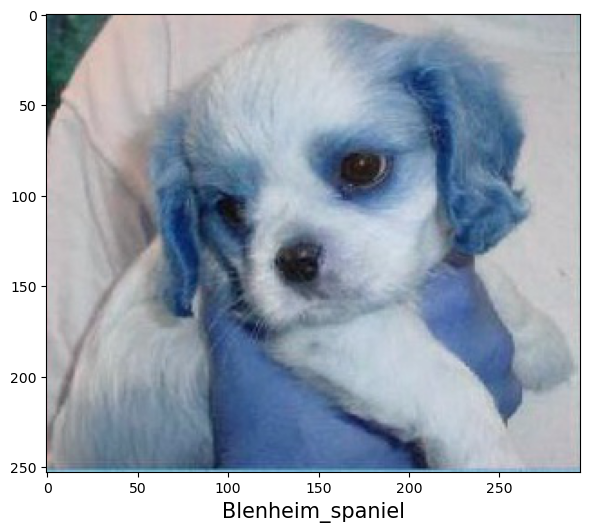

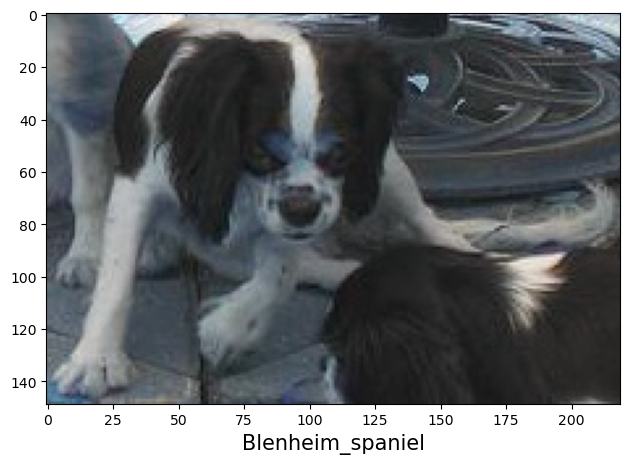

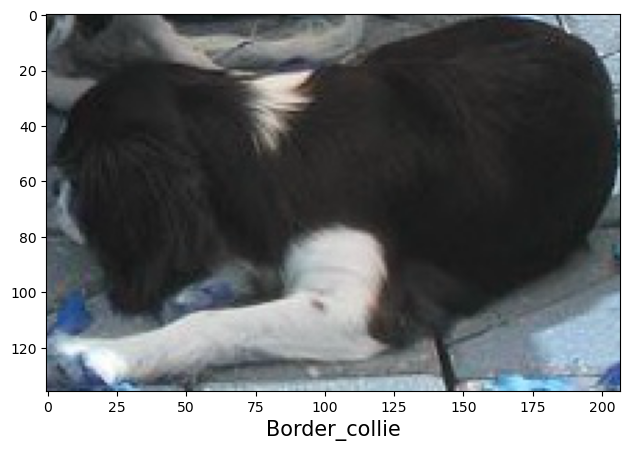

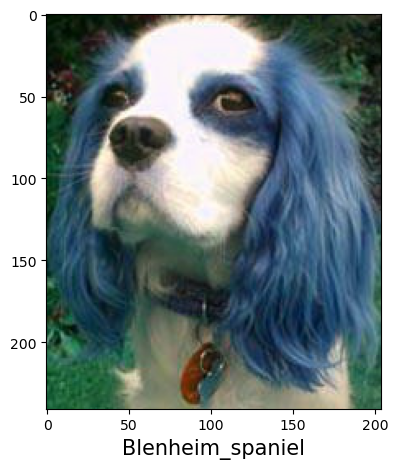

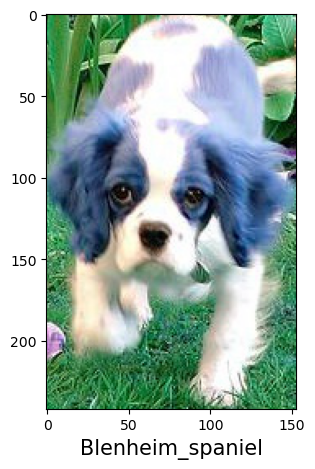

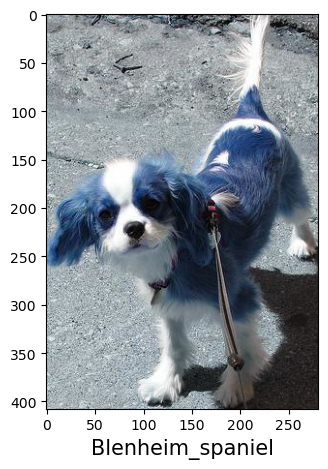

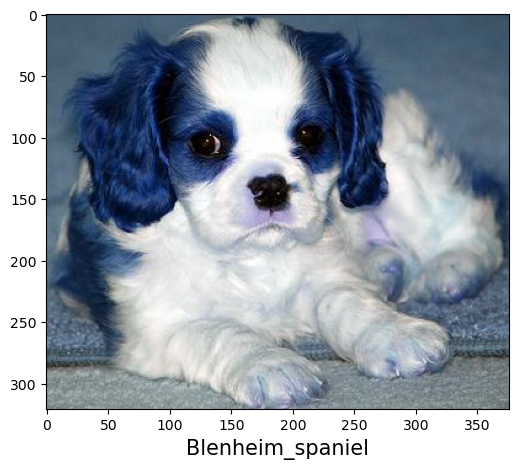

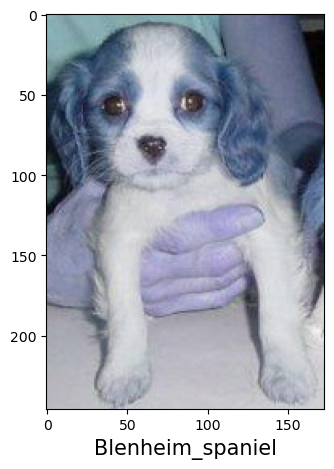

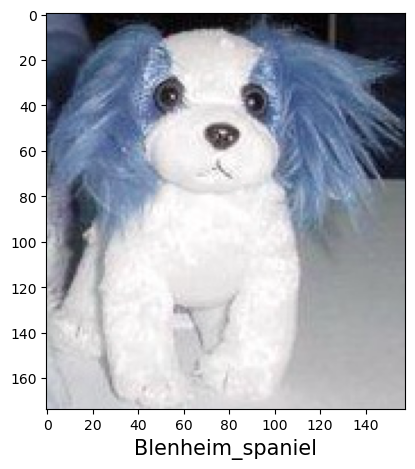

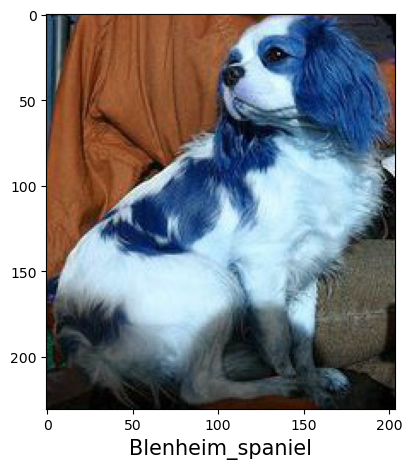

In [47]:
plt.figure(figsize=(6,6))

for index , data in test_dataframe[200:210].iterrows():
    img = data['file_name']
    label = data['breed']
    img = cv2.imread(img)
#     plt.subplot(2,5, index+1)
    plt.imshow(img)
    plt.xlabel(label,fontsize = (15))
    plt.tight_layout()
    plt.show()